# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Loading data

[SOURCE](https://www.kaggle.com/datasets/mikhail1681/walmart-sales/data): https://www.kaggle.com/datasets/mikhail1681/walmart-sales/data

In [ ]:
data = pd.read_csv('Walmart_Sales.csv')
df = data.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
# Set visualization style
sns.set_theme(style="whitegrid")

# Dataset Overview

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df.drop('Date', axis=1, inplace=True)

In [ ]:
df.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'Day', 'Month', 'Year'],
      dtype='object')

In [ ]:
# Check nulls
df.isnull().sum()

,0
Store,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0
Day,0
Month,0
Year,0


In [ ]:
# check duplicates in the df
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
 7   Day           6435 non-null   int32  
 8   Month         6435 non-null   int32  
 9   Year          6435 non-null   int32  
dtypes: float64(5), int32(3), int64(2)
memory usage: 427.5 KB


In [ ]:
# unique values in store: Num. of stores
df['Store'].nunique()

45

In [ ]:
df['Holiday_Flag'].unique()

array([0, 1])

In [ ]:
# Correlation checking
df.corr().style.background_gradient()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
Store,1.000000,-0.335332,-0.000000,-0.022659,0.060023,-0.209492,0.223531,0.000000,0.000000,0.000000
Weekly_Sales,-0.335332,1.000000,0.036891,-0.063810,0.009464,-0.072634,-0.106176,-0.017409,0.076143,-0.018378
Holiday_Flag,-0.000000,0.036891,1.000000,-0.155091,-0.078347,-0.002162,0.010960,0.044526,0.122996,-0.056783
Temperature,-0.022659,-0.063810,-0.155091,1.000000,0.144982,0.176888,0.101158,0.026973,0.235862,0.064269
Fuel_Price,0.060023,0.009464,-0.078347,0.144982,1.000000,-0.170642,-0.034684,0.028073,-0.042156,0.779470
CPI,-0.209492,-0.072634,-0.002162,0.176888,-0.170642,1.000000,-0.302020,0.002684,0.004980,0.074796
Unemployment,0.223531,-0.106176,0.010960,0.101158,-0.034684,-0.302020,1.000000,-0.004233,-0.012746,-0.241813
Day,0.000000,-0.017409,0.044526,0.026973,0.028073,0.002684,-0.004233,1.000000,0.015192,0.006406
Month,0.000000,0.076143,0.122996,0.235862,-0.042156,0.004980,-0.012746,0.015192,1.000000,-0.194465
Year,0.000000,-0.018378,-0.056783,0.064269,0.779470,0.074796,-0.241813,0.006406,-0.194465,1.000000


# EDA (Exploratory Data Analysis)

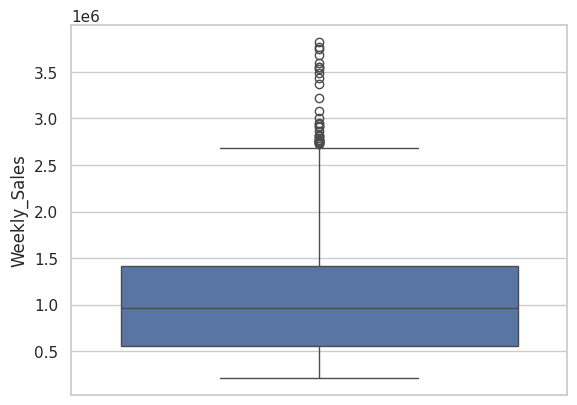

In [ ]:
# check outliers of Weekly_sales
sns.boxplot(df['Weekly_Sales'])
plt.show()

In [ ]:
# remove outliers of Weekly_Sales using scipy (e.g keeping values between 3 std)
df = df[stats.zscore(df['Weekly_Sales']) < 3]

> Insight: Handled outliers of Weekly_Sales by keeping rows those contains values less than std 3

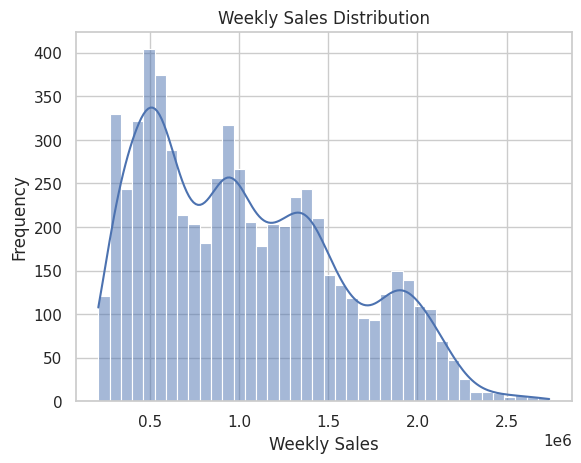

In [ ]:
# sales distribution checking
sns.histplot(df['Weekly_Sales'], kde=True, bins=40)
plt.title('Weekly Sales Distribution')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.show()

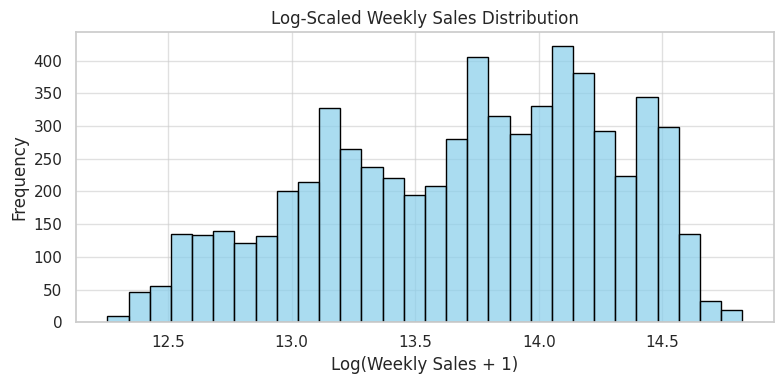

In [ ]:
# Add a small constant to avoid log(0)
# Using Log-Scale Histogram: The log transformation compresses large values while keeping smaller values relatively unaffected.
log_sales = np.log1p(df['Weekly_Sales'])

plt.figure(figsize=(8, 4))
sns.histplot(log_sales, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Log-Scaled Weekly Sales Distribution')
plt.xlabel('Log(Weekly Sales + 1)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.6)
plt.tight_layout()
plt.show()

> Insight: After log transformation, we can see that weekly sales is almost normally distributed , which is very necessary for linear modeling.


In [ ]:
df.columns

Index(['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price',
       'CPI', 'Unemployment', 'Day', 'Month', 'Year'],
      dtype='object')

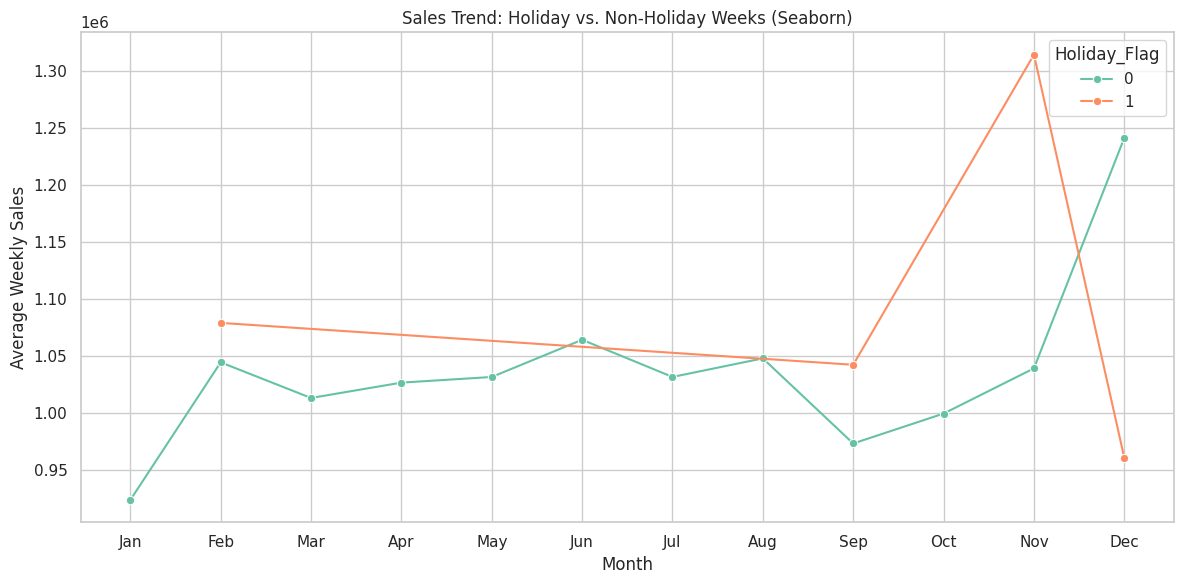

In [ ]:
# check monthly sales trends on holidays vs non holidays
plt.figure(figsize=(12, 6))
avg_sales = df.groupby(['Month', 'Holiday_Flag']).agg({'Weekly_Sales': 'mean'}).reset_index()
sns.lineplot(data=avg_sales, x='Month', y='Weekly_Sales', hue='Holiday_Flag', marker='o', palette='Set2')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales') # using average sales for better comparison
plt.title('Sales Trend: Holiday vs. Non-Holiday Weeks (Seaborn)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.tight_layout()
plt.show()

> Insight:
- We can see that sales on holidays is always greater than non-holidays.
- Looking deeper we may notice that sales are drastically higher in months of Sept-Nov.
(Maybe for events/festival discounts)

---
Therefore, Month and Holiday_Flag can be important features

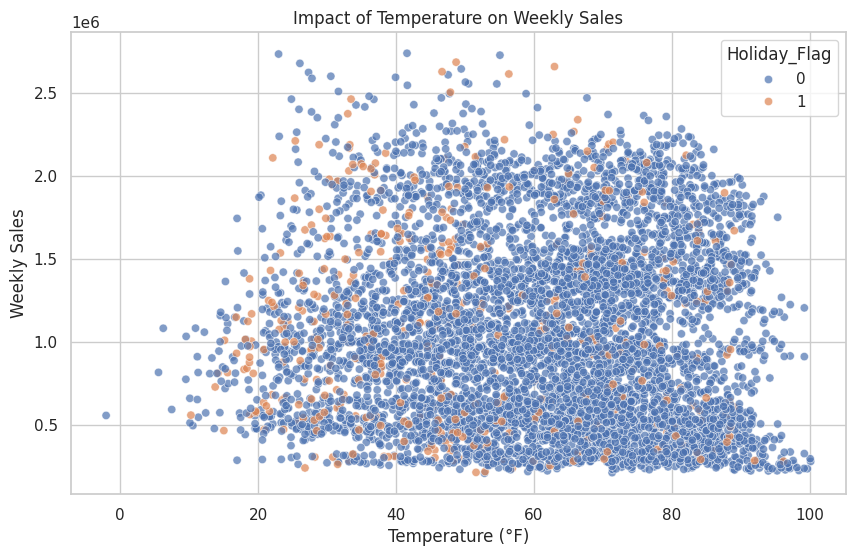

In [ ]:
# checking the impact of temperature on sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Temperature', y='Weekly_Sales', hue='Holiday_Flag', alpha=0.7)
plt.title('Impact of Temperature on Weekly Sales')
plt.xlabel('Temperature (°F)')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()


> Insight: In the scatterplot, there are notable orange dots in lower temperature region.
Which means People like to do shopping on `Cool Holidays`.

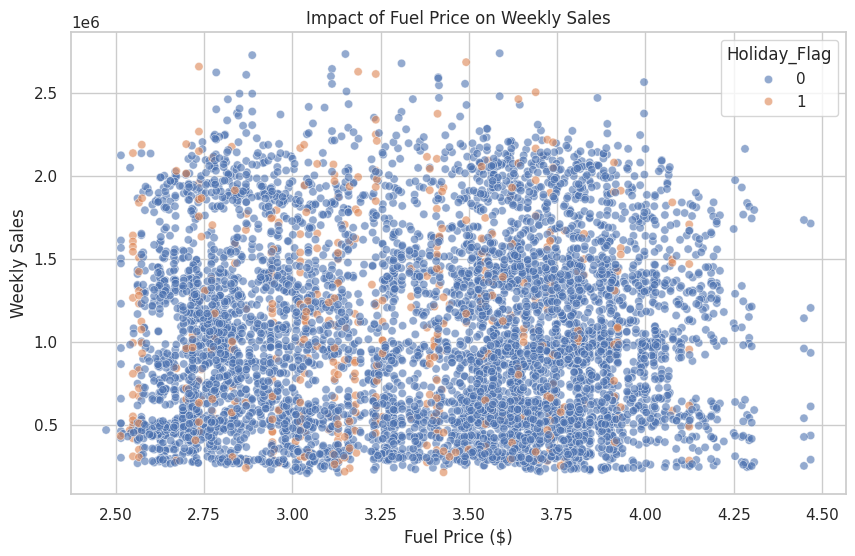

In [ ]:
# Effect of fuel price on sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Fuel_Price', y='Weekly_Sales', hue='Holiday_Flag', alpha=0.6)
plt.title('Impact of Fuel Price on Weekly Sales')
plt.xlabel('Fuel Price ($)')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()


> Insight: From the plotting,
- We can say 'When fuel price is high, people mostly choose to do shopping on non-holidays'
- With decent fuel price, the total sales($) is higher.
---
Stable fuel prices may incentivize holiday shopping. Fuel price trends could be a factor to monitor when planning holiday promotions.

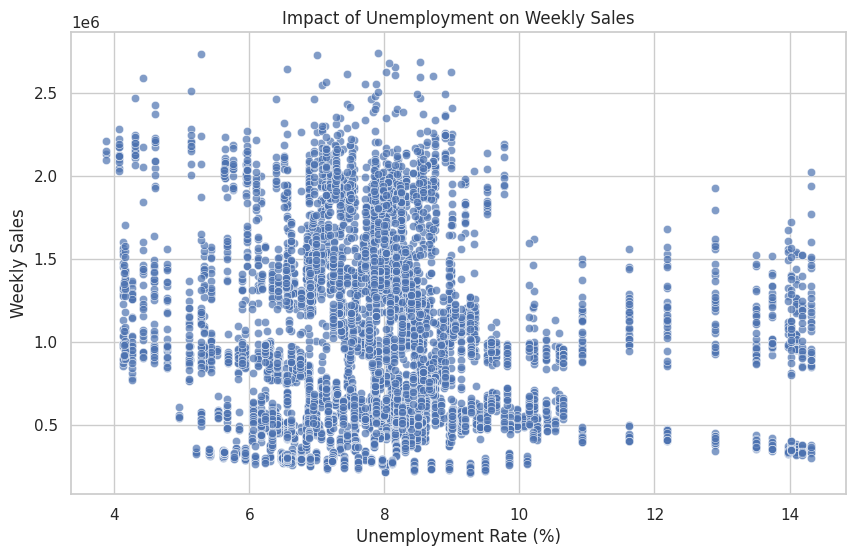

In [ ]:
# Unemployment vs Weekly Sales
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Unemployment', y='Weekly_Sales', alpha=0.7)
plt.title('Impact of Unemployment on Weekly Sales')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()

> Insight:
- It is very clear that lower unemployment rate has higher sales days.
- Total sales($) is less in higher unemployment rate.
---
Unemployment is a critical macroeconomic factor affecting sales. Monitoring unemployment trends can help predict revenue fluctuations...

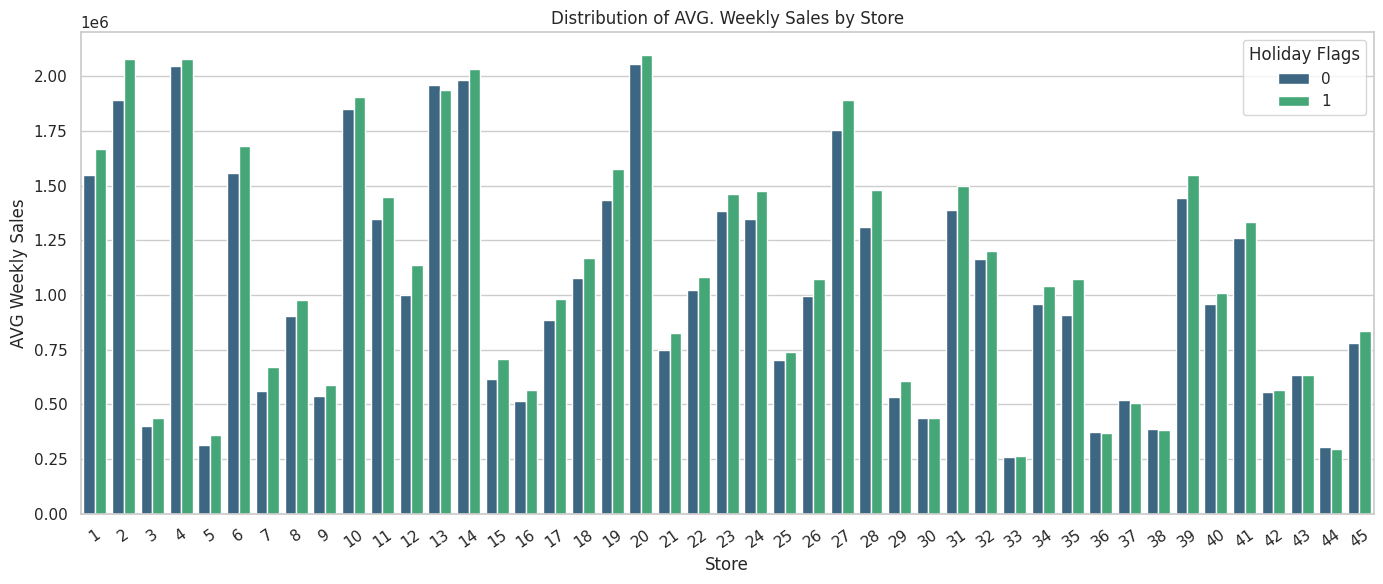

In [ ]:
# Average weekly sales by stores on Holiday_Flags
plt.figure(figsize=(14, 6))
avg_sales = df.groupby(['Store', 'Holiday_Flag'])['Weekly_Sales'].mean().reset_index()
sns.barplot(data=avg_sales, x='Store', y='Weekly_Sales', hue='Holiday_Flag', palette='viridis')
plt.xlabel('Store')
plt.ylabel('AVG Weekly Sales')
plt.title('Distribution of AVG. Weekly Sales by Store')
plt.xticks(rotation=35)
plt.legend(title='Holiday Flags')
plt.tight_layout()
plt.show()

In [ ]:
# df[['Day', 'Month', 'Year', 'CPI', 'Weekly_Sales']]
df.groupby(['Year', 'Month']).agg({'CPI':'mean', 'Weekly_Sales':'mean'})

CPI  Weekly_Sales
Year Month                          
2010 2      167.834459  1.057405e+06
     3      167.930846  1.010666e+06
     4      167.678437  1.028499e+06
     5      167.641758  1.037283e+06
     6      168.004688  1.068034e+06
     7      168.001633  1.033689e+06
     8      168.211886  1.042445e+06
     9      168.255024  9.848216e+05
     10     168.453666  9.651637e+05
     11     169.031483  1.077853e+06
     12     168.938985  1.165716e+06
2011 1      168.791818  9.094665e+05
     2      169.590035  1.035174e+06
     3      170.323888  9.964247e+05
     4      171.000805  1.006784e+06
     5      171.376996  1.009156e+06
     6      171.226784  1.054297e+06
     7      171.572535  1.021828e+06
     8      171.894833  1.047774e+06
     9      172.254241  9.815455e+05
     10     172.909653  1.018118e+06
     11     173.781877  1.127483e+06
     12     174.128394  1.198674e+06
2012 1      174.267656  9.383026e+05
     2      174.618349  1.067020e+06
     3      175.141545  1.028932e+06
     4      175.496643  1.049561e+06
     5      175.615439  1.048703e+06
     6      175.603775  1.069379e+06
     7      175.667184  1.041719e+06
     8      175.775079  1.052670e+06
     9      176.185210  1.003586e+06
     10     176.610915  1.024232e+06

In [ ]:
df.groupby('Year').agg({'CPI':'mean', 'Weekly_Sales':'mean'})

,CPI,Weekly_Sales
Year,,
2010,168.181057,1.042497e+06
2011,171.608969,1.034512e+06
2012,175.498781,1.033660e+06


> Insight: CPI(Consumer Price Index) is a tool to measure inflation. It is effecting negatively the total sales. But after 2011 the increase in inflation couldn't effect the sales that much...
----
The Resilience post-2011 suggests that Consumer spending adapted to inflation, possibly due to stable incomes or effective pricing strategies.

# Hypothesis Testing

 1. Hypothesis of Holidays on Sales:
 ```
 H0: The average sales on holidays and non-holidays are the same.
 H@: The average sales on holidays are higher than on non-holidays.
 ```

In [ ]:
holiday_sales = df[df['Holiday_Flag'] == 1]['Weekly_Sales']
non_holiday_sales = df[df['Holiday_Flag'] == 0]['Weekly_Sales']

t_stat, p_val = stats.ttest_ind(holiday_sales, non_holiday_sales, equal_var=False)
print(f"T-Statistic: {t_stat}, P-Value: {p_val}")

if p_val < 0.05:
    print("Reject Null Hypothesis: Sales are significantly higher on holidays.")
else:
    print("Fail to Reject Null Hypothesis: No significant difference in sales.")


T-Statistic: 1.882825178984065, P-Value: 0.060305871432663846
Fail to Reject Null Hypothesis: No significant difference in sales.


 2. Hypothesis of Monthly Sales Variation:
 ```
 H0: Sales do not significantly differ between months.
 H@: Sales significantly vary across months.
 ```

In [ ]:
monthly_sales = [df[df['Month'] == month]['Weekly_Sales'] for month in range(1, 13)]
f_stat, p_val = stats.f_oneway(*monthly_sales)
print(f"F-Statistic: {f_stat}, P-Value: {p_val}")

if p_val < 0.05:
    print("Reject Null Hypothesis: Sales vary significantly across months.")
else:
    print("Fail to Reject Null Hypothesis: No significant variation in monthly sales.")


F-Statistic: 5.645607831200455, P-Value: 4.202974379160189e-09
Reject Null Hypothesis: Sales vary significantly across months.


3. Hypothesis of CPI's Impact on Sales
 ```
 H0: CPI has no effect on sales.
 H@: CPI negatively impacts sales.
 ```

In [ ]:
corr, p_val = stats.pearsonr(df['CPI'], df['Weekly_Sales'])
print(f"Correlation Coefficient: {corr}, P-Value: {p_val}")

if p_val < 0.05:
    print("Reject Null Hypothesis: CPI has a significant impact on sales.")
else:
    print("Fail to Reject Null Hypothesis: CPI does not significantly impact sales.")


Correlation Coefficient: -0.06980239377303664, P-Value: 2.2490004880046804e-08
Reject Null Hypothesis: CPI has a significant impact on sales.


 4. Hypothesis of Unemployment's Effect on Sales
 ```
 H0: Unemployment has no effect on sales.
 H@: Higher unemployment is associated with lower sales.
 ```

In [ ]:
corr, p_val = stats.pearsonr(df['Unemployment'], df['Weekly_Sales'])
print(f"Correlation Coefficient: {corr}, P-Value: {p_val}")

if p_val < 0.05:
    print("Reject Null Hypothesis: Unemployment has a significant impact on sales.")
else:
    print("Fail to Reject Null Hypothesis: Unemployment does not significantly impact sales.")


Correlation Coefficient: -0.10502453149260602, P-Value: 3.5689386701447026e-17
Reject Null Hypothesis: Unemployment has a significant impact on sales.
